In [4]:
# Exercise 4: Validation curve and Learning curve

In [1]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate data
X, y = make_classification(
    n_samples=100000, n_features=30,
    n_informative=10, flip_y=0.2, random_state=43
)

In [3]:
# 1. VALIDATION CURVE

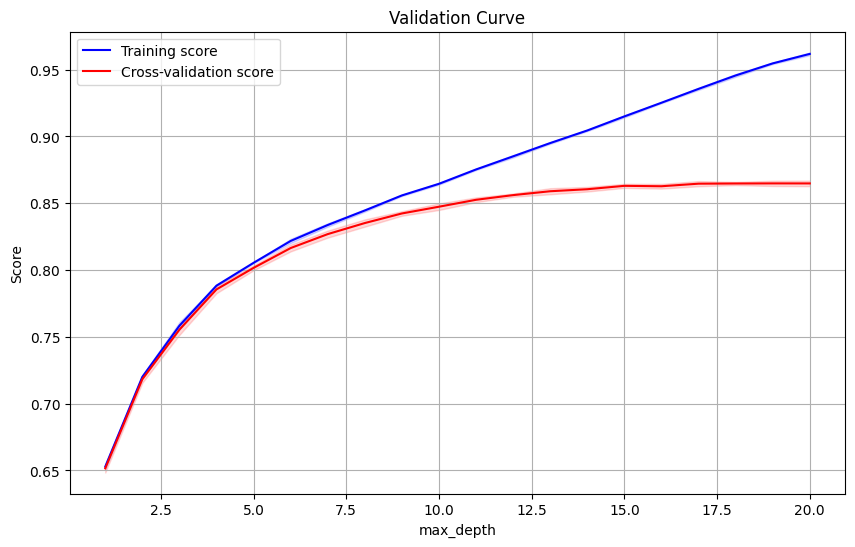

In [5]:
# Compute training and validation scores
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=43),
    X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Plot validation curve
plt.figure(figsize=(10, 6))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_mean - train_std, 
                 train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, label='Cross-validation score', color='red')
plt.fill_between(param_range, test_mean - test_std, 
                 test_mean + test_std, alpha=0.15, color='red')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [6]:
# 2. LEARNING CURVE

In [ ]:
clf = RandomForestClassifier(max_depth=12, random_state=43)
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf, X, y, cv=10, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True
)

# Plot learning curves (3 subplots)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Learning curve
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

axes[0].plot(train_sizes, train_mean, label='Training score')
axes[0].fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.15)
axes[0].plot(train_sizes, test_mean, label='Cross-validation score')
axes[0].fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.15)
axes[0].set_xlabel('Training examples')
axes[0].set_ylabel('Score')
axes[0].set_title('Learning Curve')
axes[0].legend(loc='best')
axes[0].grid(True)

# Plot 2: Scalability
fit_mean = np.mean(fit_times, axis=1)
fit_std = np.std(fit_times, axis=1)
axes[1].plot(train_sizes, fit_mean)
axes[1].fill_between(train_sizes, fit_mean - fit_std,
                     fit_mean + fit_std, alpha=0.15)
axes[1].set_xlabel('Training examples')
axes[1].set_ylabel('Fit time (s)')
axes[1].set_title('Scalability of the model')
axes[1].grid(True)

# Plot 3: Performance
axes[2].plot(fit_mean, test_mean)
axes[2].set_xlabel('Fit time (s)')
axes[2].set_ylabel('Score')
axes[2].set_title('Performance of the model')
axes[2].grid(True)

plt.tight_layout()
plt.show()